<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

h2oframe에서 fraction은 어렵다.
--> pandas dataframe에서 필터링해서 h2oframe으로...

hf = h2o.H2OFrame(df)


Candel, A., Parmar, V., LeDell, E., and Arora, A. (Jun 2020). Deep Learning
with H2O. http://h2o.ai/resources.

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [117]:
!nvidia-smi

Thu Jun 25 07:48:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |    129MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [118]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [119]:
!pip install h2o

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import urllib
import h2o
from h2o.automl import H2OAutoML
import sys
import os

import warnings
warnings.filterwarnings("ignore")

In [121]:
print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sys: {}'.format(sys.version))

matplotlib: 3.2.2
seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5
sys: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [122]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_3unnkb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.013 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [123]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [124]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [134]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_NVOC_SORT.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
print(df.shape)
print(type(df))
df.dtypes


(2603543, 9)
<class 'pandas.core.frame.DataFrame'>


Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                       int64
dtype: object

In [135]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0


In [136]:
df_on = df[(df['nvoc'] > 0)]
df_on.shape

(2376, 9)

In [137]:
df_off = df[(df['nvoc'] == 0)]
df_off.shape

(2601167, 9)

In [138]:
df_off = df_off[(df_off['a2.buffer_overflow'] > 0) | (df_off['a2.pts_advanced_error'] > 0) | (df_off['a2.stb_rtp_errcnt'] > 0) | (df_off['a2.no_stream_error'] > 0) | (df_off['a2.not_decoding_error'] > 0)]
df_off.shape

(76442, 9)

In [139]:
df_off = df_off.sample(n=2400)
print(df_off.shape)
df_off.head()

(2400, 9)


,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
839685,697972,433EE5D7CA36CB5CBCF3442EBEE35B25AF5E1B49,2020-06-07 23:40:00,0.0,0.0,2.0,0.0,0.0,0
1489938,1459978,904466603C2E2A482C56A4513FE9E6CBD0A93CB4,2020-06-03 15:10:00,0.0,0.0,993.0,0.0,0.0,0
1348637,1288722,7F529E6D5CB8A858ED28E7E4F97B56F36FD597A2,2020-06-06 09:00:00,0.0,0.0,484.0,0.0,0.0,0
1112320,1016691,635DFC55273204F0313B63AC8AEEFF9E86D7DB10,2020-06-05 06:50:00,0.0,0.0,9.0,0.0,0.0,0
1031782,925784,59F2CB8B08C067A2D1D616575C1282D9BD193C49,2020-06-05 23:50:00,0.0,0.0,326.0,0.0,0.0,0


In [140]:
df = pd.concat([df_on, df_off]).sample(frac = 1.0)
print(df.shape)
df.head(10)

(4776, 9)


,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
89672,755524,48F6FB27436F71F4EB549D2131D5380D98FBB729,2020-06-07 15:40:00,0.0,0.0,2.0,0.0,0.0,0
1636637,1626262,9FFB7ABC55D179AE26310B91B3A3C42659FF57CE,2020-06-06 09:00:00,0.0,0.0,37.0,0.0,0.0,0
204310,2125845,D07B7DA2A5B7E566AE56A78EFB335B1212C58DC0,2020-06-03 16:00:00,0.0,0.0,2.0,135.0,0.0,1
1816173,1848427,B4B5D3B7BD78B689299E901BFD2B5C41C55CF580,2020-06-05 03:40:00,0.0,0.0,7.0,0.0,0.0,0
1477978,1446866,8F151247AAFF5E82E6D57221FAD039480ED13C5C,2020-06-08 13:50:00,0.0,0.0,0.0,0.0,0.0,1
2224637,2335229,E78763D07AE49FD6D7D703C986B988B327E23159,2020-06-01 17:00:00,0.0,0.0,0.0,0.0,0.0,1
99016,840900,5258DEDEAFDC369DD922E4B7BE1B223E6F2289EA,2020-06-08 12:40:00,0.0,0.0,0.0,0.0,0.0,1
2207632,2314768,E5775B579FA411A3931EC14338FBE7CF2A8332FD,2020-06-03 14:50:00,0.0,0.0,2.0,0.0,0.0,0
1996800,2061310,CA92C2E131E552DE591123334589A70B8822FB88,2020-06-03 12:10:00,3.0,3.0,3.0,0.0,0.0,0
1637004,1626629,9FFB7ABC55D179AE26310B91B3A3C42659FF57CE,2020-06-08 22:10:00,0.0,0.0,32.0,0.0,0.0,0


In [141]:
#hdf = h2o.import_file(OUTPUT_FILE)
hdf = h2o.H2OFrame(df)
print(type(hdf))
hdf.types

Parse progress: |█████████████████████████████████████████████████████████| 100%
<class 'h2o.frame.H2OFrame'>


{'Unnamed: 0': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'int'}

#4번: 비율 비슷하게 맞추어 학습

In [142]:
hdf.describe()

Rows:4776
Cols:9




,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
type,int,enum,time,int,int,int,int,int,int
mins,660.0,,1590970200000.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
mean,1292262.5477386934,,1591299282412.0574,13.465661641541043,72.18467336683412,447.7719849246223,3.6270938023450565,-0.012772194304857624,0.49748743718592964
maxs,2603156.0,,1591660200000.0,19644.0,140553.0,149082.0,600.0,15.0,1.0
sigma,745837.9467197788,,201756238.24220908,348.0692247356334,2889.9218061168635,5305.059447756317,29.9528594866432,0.28513646816199445,0.500046039607314
zeros,0,,0,4536,4534,1943,4439,4660,2400
missing,0,0,0,0,0,0,0,0,0
0,755524.0,48F6FB27436F71F4EB549D2131D5380D98FBB729,2020-06-07 15:40:00,0.0,0.0,2.0,0.0,0.0,0.0
1,1626262.0,9FFB7ABC55D179AE26310B91B3A3C42659FF57CE,2020-06-06 09:00:00,0.0,0.0,37.0,0.0,0.0,0.0
2,2125845.0,D07B7DA2A5B7E566AE56A78EFB335B1212C58DC0,2020-06-03 16:00:00,0.0,0.0,2.0,135.0,0.0,1.0


In [143]:
# 2진분류 시 target y는 factor(파이썬에서는 enum) 타입이어야...
hdf['nvoc'] = hdf['nvoc'].asfactor()
hdf.types

{'Unnamed: 0': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'enum'}

In [144]:
data_train,data_test,data_valid = hdf.split_frame(ratios=[.7, .15])

In [147]:
y = "nvoc"
x = hdf.columns
x.remove(y)
x.remove('Unnamed: 0')
x.remove('a1.ucube_jnr_no')
x.remove('a2.firstlogtime')
x

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

#Create model

In [148]:
#aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "GBM", "DeepLearning", "GLM", "DRF" ], verbosity="info", nfolds=0)
aml = H2OAutoML(max_models = 20, seed = 20, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

# Train model

In [47]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)
!nvidia-smi

AutoML progress: |
04:50:26.522: Project: AutoML_20200625_45026518
04:50:26.528: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:50:26.528: Setting stopping tolerance adaptively based on the training frame: 0.004314675785653447
04:50:26.528: Build control seed: 20
04:50:26.528: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
04:50:26.625: training frame: Frame key: automl_training_py_13_sid_9d2a    cols: 9    rows: 48348  chunks: 8    size: 969896  checksum: 1014020617482696483
04:50:26.625: validation frame: Frame key: py_15_sid_9d2a    cols: 9    rows: 11527  chunks: 8    size: 485480  checksum: 9111477653566297533
04:50:26.631: leaderboard frame: Frame key: automl_leaderboard_py_13_sid_9d2a    cols: 9    rows: 5368  chunks: 8    size: 402904  checksum: 1765907420202672252
04:50:26.631: blending frame: NULL
04:50:26.631: response column: nvoc
0

In [48]:
leaderboard = aml.leaderboard
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20200625_045026,0.81897,0.0295155,0.0329353,0.402545,0.0728392,0.00530555
XGBoost_grid__1_AutoML_20200625_045026_model_2,0.801448,0.0297716,0.0348753,0.372464,0.0727769,0.00529648
XGBoost_grid__1_AutoML_20200625_045026_model_1,0.797105,0.0300191,0.0479947,0.449212,0.0727556,0.00529338
XGBoost_1_AutoML_20200625_045026,0.796807,0.0299355,0.0370106,0.357377,0.0727935,0.00529889
XGBoost_3_AutoML_20200625_045026,0.79311,0.0302316,0.0290645,0.406666,0.0729386,0.00532004
GBM_grid__1_AutoML_20200625_045026_model_1,0.790168,0.0334611,0.029468,0.370123,0.0750138,0.00562706
GBM_2_AutoML_20200625_045026,0.786868,0.0306629,0.0367187,0.449681,0.0734174,0.00539012
GBM_grid__1_AutoML_20200625_045026_model_2,0.774738,0.0309012,0.0317764,0.417726,0.073261,0.00536718
GBM_1_AutoML_20200625_045026,0.774044,0.0404099,0.0256043,0.436654,0.0815482,0.00665011
XGBoost_grid__1_AutoML_20200625_045026_model_3,0.771796,0.0337088,0.0186314,0.398883,0.077057,0.00593778


#Test

In [49]:
data_pred=aml.leader.predict(data_test)
data_pred.head()

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
0,0.998129,0.00187134
0,0.997186,0.0028141
0,0.997462,0.00253817
0,0.995322,0.00467756
0,0.997774,0.00222624
0,0.996751,0.00324908
0,0.961559,0.0384406
0,0.997857,0.00214327
0,0.997945,0.00205542
0,0.997774,0.00222624


# Performance check


In [50]:
aml.leader.model_performance(data_test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.004318009141324922
RMSE: 0.06571156018026754
LogLoss: 0.027436742737109866
Mean Per-Class Error: 0.37608261737394777
AUC: 0.6480274234140415
AUCPR: 0.010226001344481617
Gini: 0.29605484682808303

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.022426119074225426: 


,,0,1,Error,Rate
0,0,11251.0,272.0,0.0236,(272.0/11523.0)
1,1,42.0,8.0,0.84,(42.0/50.0)
2,Total,11293.0,280.0,0.0271,(314.0/11573.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.022426,0.048485,164.0
1,max f2,0.015002,0.083969,216.0
2,max f0point5,0.022426,0.034188,164.0
3,max accuracy,0.111947,0.995593,0.0
4,max precision,0.022426,0.028571,164.0
5,max recall,0.001599,1.000000,398.0
6,max specificity,0.111947,0.999913,0.0
7,max absolute_mcc,0.015002,0.061242,216.0
8,max min_per_class_accuracy,0.004040,0.613295,357.0
9,max mean_per_class_accuracy,0.004563,0.623917,349.0



Gains/Lift Table: Avg response rate:  0.43 %, avg score:  0.53 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010542,0.043760,3.794426,3.794426,0.016393,0.059559,0.016393,0.059559,0.04,0.04,279.442623,279.442623
1,,2,0.020047,0.027718,4.208364,3.990690,0.018182,0.035296,0.017241,0.048055,0.04,0.08,320.836364,299.068966
2,,3,0.031107,0.017139,7.233125,5.143556,0.031250,0.021716,0.022222,0.038690,0.08,0.16,623.312500,414.355556
3,,4,0.041994,0.014772,5.510952,5.238807,0.023810,0.015364,0.022634,0.032642,0.06,0.22,451.095238,423.880658
4,,5,0.053659,0.014291,0.000000,4.099936,0.000000,0.014354,0.017713,0.028667,0.00,0.22,-100.000000,309.993559
5,,6,0.101789,0.011243,1.662190,2.947284,0.007181,0.012303,0.012733,0.020929,0.08,0.30,66.219031,194.728353
6,,7,0.163225,0.008424,1.302166,2.328078,0.005626,0.009061,0.010058,0.016462,0.08,0.38,30.216596,132.807835
7,,8,0.200121,0.007562,0.542061,1.998791,0.002342,0.008012,0.008636,0.014904,0.02,0.40,-45.793911,99.879102
8,,9,0.306748,0.004945,0.937844,1.630000,0.004052,0.005926,0.007042,0.011783,0.10,0.50,-6.215559,63.000000
9,,10,0.407068,0.003863,1.395538,1.572218,0.006029,0.004335,0.006793,0.009948,0.14,0.64,39.553833,57.221821


#나머지 모델도 테스트

In [51]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

['XGBoost_2_AutoML_20200625_045026',
 'XGBoost_grid__1_AutoML_20200625_045026_model_2',
 'XGBoost_grid__1_AutoML_20200625_045026_model_1',
 'XGBoost_1_AutoML_20200625_045026',
 'XGBoost_3_AutoML_20200625_045026',
 'GBM_grid__1_AutoML_20200625_045026_model_1',
 'GBM_2_AutoML_20200625_045026',
 'GBM_grid__1_AutoML_20200625_045026_model_2',
 'GBM_1_AutoML_20200625_045026',
 'XGBoost_grid__1_AutoML_20200625_045026_model_3',
 'XGBoost_grid__1_AutoML_20200625_045026_model_4',
 'GLM_1_AutoML_20200625_045026',
 'GBM_3_AutoML_20200625_045026',
 'GBM_5_AutoML_20200625_045026',
 'DeepLearning_grid__1_AutoML_20200625_045026_model_1',
 'DeepLearning_1_AutoML_20200625_045026',
 'DRF_1_AutoML_20200625_045026',
 'GBM_4_AutoML_20200625_045026',
 'XRT_1_AutoML_20200625_045026',
 'DeepLearning_grid__2_AutoML_20200625_045026_model_1']

In [52]:
drf = h2o.get_model([i for i in model_ids if "DRF" in i][0])

In [53]:
#h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
h2o.get_model([i for i in model_ids if "GBM" in i][0])

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20200625_045026_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,3778.0,0.0,3.0,2.0,1.0,8.0,5.3




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.005008860239239661
RMSE: 0.07077330174041381
LogLoss: 0.029523628761302226
Mean Per-Class Error: 0.31315954925360723
AUC: 0.7449248617406129
AUCPR: 0.054265848377333455
Gini: 0.4898497234812258

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.041236615703022894: 


,,0,1,Error,Rate
0,0,47817.0,281.0,0.0058,(281.0/48098.0)
1,1,219.0,31.0,0.876,(219.0/250.0)
2,Total,48036.0,312.0,0.0103,(500.0/48348.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.123662e-02,0.110320,64.0
1,max f2,3.175249e-02,0.132556,107.0
2,max f0point5,7.925697e-02,0.117801,21.0
3,max accuracy,6.165554e-01,0.994891,2.0
4,max precision,9.999997e-01,1.000000,0.0
5,max recall,3.149344e-03,1.000000,308.0
6,max specificity,9.999997e-01,1.000000,0.0
7,max absolute_mcc,2.515875e-01,0.121941,10.0
8,max min_per_class_accuracy,4.417355e-03,0.625681,302.0
9,max mean_per_class_accuracy,4.417355e-03,0.686840,302.0



Gains/Lift Table: Avg response rate:  0.52 %, avg score:  0.53 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010404,3.925656e-02,14.225654,14.225654,0.073559,5.786655e-02,0.073559,0.057867,0.148,0.148,1322.565408,1322.565408
1,,2,0.020001,2.651815e-02,5.835103,10.199578,0.030172,3.461241e-02,0.052740,0.046708,0.056,0.204,483.510345,919.957808
2,,3,0.031708,1.898998e-02,3.758502,7.821464,0.019435,2.169878e-02,0.040444,0.037475,0.044,0.248,275.850177,682.146380
3,,4,0.041139,1.365116e-02,4.665158,7.097846,0.024123,1.414691e-02,0.036702,0.032126,0.044,0.292,366.515789,609.784615
4,,5,0.052143,1.119574e-02,2.181113,6.060281,0.011278,1.146260e-02,0.031337,0.027766,0.024,0.316,118.111278,506.028084
5,,6,0.106644,8.952217e-03,2.055019,4.013372,0.010626,9.061055e-03,0.020753,0.018207,0.112,0.428,105.501935,301.337161
6,,7,0.180152,5.339995e-03,1.088306,2.819837,0.005627,6.025000e-03,0.014581,0.013236,0.080,0.508,8.830613,181.983743
7,,8,0.234363,4.841978e-03,1.475712,2.508925,0.007631,4.842076e-03,0.012973,0.011294,0.080,0.588,47.571156,150.892454
8,,9,0.376251,4.417355e-03,1.127650,1.988033,0.005831,4.417744e-03,0.010280,0.008701,0.160,0.748,12.765015,98.803276
9,,10,0.407070,3.575682e-03,0.519173,1.876829,0.002685,3.754340e-03,0.009705,0.008327,0.016,0.764,-48.082685,87.682902




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.003913912829348655
RMSE: 0.06256127260013702
LogLoss: 0.02465159002482264
Mean Per-Class Error: 0.3598763281658248
AUC: 0.6395604714625791
AUCPR: 0.014959170415341946
Gini: 0.2791209429251582

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05746798488177358: 


,,0,1,Error,Rate
0,0,11468.0,14.0,0.0012,(14.0/11482.0)
1,1,43.0,2.0,0.9556,(43.0/45.0)
2,Total,11511.0,16.0,0.0049,(57.0/11527.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.057468,0.065574,9.0
1,max f2,0.034979,0.096419,47.0
2,max f0point5,0.057468,0.091743,9.0
3,max accuracy,0.507228,0.996009,0.0
4,max precision,0.057468,0.125000,9.0
5,max recall,0.003149,1.000000,169.0
6,max specificity,0.507228,0.999913,0.0
7,max absolute_mcc,0.057468,0.072399,9.0
8,max min_per_class_accuracy,0.004098,0.600000,164.0
9,max mean_per_class_accuracy,0.006533,0.640124,150.0



Gains/Lift Table: Avg response rate:  0.39 %, avg score:  0.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010931,0.038387,8.131922,8.131922,0.031746,0.054743,0.031746,0.054743,0.088889,0.088889,713.192240,713.192240
1,,2,0.020040,0.024455,7.318730,7.762290,0.028571,0.032549,0.030303,0.044655,0.066667,0.155556,631.873016,676.228956
2,,3,0.031231,0.018990,3.971404,6.403889,0.015504,0.021187,0.025000,0.036246,0.044444,0.200000,297.140396,540.388889
3,,4,0.040080,0.013632,2.511329,5.544493,0.009804,0.014055,0.021645,0.031346,0.022222,0.222222,151.132898,454.449254
4,,5,0.050924,0.011196,4.098489,5.236570,0.016000,0.011487,0.020443,0.027117,0.044444,0.266667,309.848889,423.657013
5,,6,0.104364,0.008952,1.247511,3.193960,0.004870,0.009059,0.012469,0.017871,0.066667,0.333333,24.751082,219.395955
6,,7,0.180793,0.005340,1.163022,2.335391,0.004540,0.005991,0.009117,0.012848,0.088889,0.422222,16.302182,133.539134
7,,8,0.232151,0.004842,0.432695,1.914466,0.001689,0.004842,0.007474,0.011077,0.022222,0.444444,-56.730480,91.446604
8,,9,0.373471,0.004417,0.943483,1.547049,0.003683,0.004418,0.006039,0.008557,0.133333,0.577778,-5.651729,54.704865
9,,10,0.402967,0.003576,2.260196,1.599249,0.008824,0.003767,0.006243,0.008207,0.066667,0.644444,126.019608,59.924889




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-25 04:51:29,0.017 sec,0.0,0.071722,0.032380,0.500000,0.005171,1.000000,0.994829,0.062372,0.025717,0.500000,0.003904,1.000000,0.996096
1,,2020-06-25 04:51:29,0.265 sec,5.0,0.071180,0.030377,0.729603,0.036834,10.817288,0.021076,0.062288,0.024810,0.637927,0.012506,6.286026,0.020907
2,,2020-06-25 04:51:29,0.478 sec,10.0,0.071021,0.029925,0.738251,0.044885,12.499303,0.009845,0.062442,0.024687,0.646969,0.016546,8.263082,0.005292
3,,2020-06-25 04:51:29,0.688 sec,15.0,0.070867,0.029682,0.737821,0.051601,13.898809,0.010466,0.062570,0.024653,0.659394,0.015744,7.942808,0.007374
4,,2020-06-25 04:51:30,0.947 sec,20.0,0.070779,0.029565,0.737756,0.054054,14.113420,0.010362,0.062564,0.024644,0.659451,0.015249,8.004861,0.004945
5,,2020-06-25 04:51:30,1.133 sec,25.0,0.070773,0.029524,0.744925,0.054266,14.225654,0.010342,0.062561,0.024652,0.639560,0.014959,8.131922,0.004945
6,,2020-06-25 04:51:30,1.320 sec,30.0,0.070773,0.029524,0.744925,0.054266,14.225654,0.010342,0.062561,0.024652,0.639560,0.014959,8.131922,0.004945



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.no_stream_error,10.912242,1.000000,0.539741
1,a2.stb_rtp_errcnt,6.108641,0.559797,0.302145
2,a2.not_decoding_error,3.146971,0.288389,0.155655
3,a2.buffer_overflow,0.041490,0.003802,0.002052
4,a2.pts_advanced_error,0.008222,0.000753,0.000407


In [54]:
h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__1_AutoML_20200625_045026_model_1


Status of Neuron Layers: predicting nvoc, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,602 weights/biases, 25.0 KB, 2,701,678 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,5,Input,15,,,,,,,,,
1,,2,200,RectifierDropout,30,0,0,0.15911,0.28918,0,0.058014,0.126676,-0.109612,0.23919
2,,3,2,Softmax,,0,0,0.073141,0.226622,0,0.000597794,0.5208,-0.0646119,1.65259




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.006605373366284703
RMSE: 0.08127344810136151
LogLoss: 0.055732508322718775
Mean Per-Class Error: 0.3092877733248962
AUC: 0.702379642281791
AUCPR: 0.030920616772494705
Gini: 0.4047592845635819

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0011180763849904195: 


,,0,1,Error,Rate
0,0,9753.0,160.0,0.0161,(160.0/9913.0)
1,1,50.0,16.0,0.7576,(50.0/66.0)
2,Total,9803.0,176.0,0.021,(210.0/9979.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.118076e-03,0.132231,77.0
1,max f2,1.118076e-03,0.181818,77.0
2,max f0point5,1.118076e-03,0.103896,77.0
3,max accuracy,2.253541e-03,0.993286,0.0
4,max precision,1.337213e-03,0.096386,43.0
5,max recall,1.084964e-08,1.000000,399.0
6,max specificity,2.253541e-03,0.999899,0.0
7,max absolute_mcc,1.118076e-03,0.139345,77.0
8,max min_per_class_accuracy,4.616975e-04,0.684455,285.0
9,max mean_per_class_accuracy,4.616975e-04,0.690712,285.0



Gains/Lift Table: Avg response rate:  0.66 %, avg score:  0.05 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010021,0.001263,13.607727,13.607727,0.090000,0.001492,0.090000,0.001492,0.136364,0.136364,1260.772727,1260.772727
1,,2,0.020042,0.001036,10.583788,12.095758,0.070000,0.001179,0.080000,0.001335,0.106061,0.242424,958.378788,1109.575758
2,,3,0.030063,0.000824,1.511970,8.567828,0.010000,0.000918,0.056667,0.001196,0.015152,0.257576,51.196970,756.782828
3,,4,0.040084,0.000698,3.023939,7.181856,0.020000,0.000761,0.047500,0.001087,0.030303,0.287879,202.393939,618.185606
4,,5,0.050005,0.000643,1.527242,6.059999,0.010101,0.000662,0.040080,0.001003,0.015152,0.303030,52.724212,505.999879
5,,6,0.100210,0.000517,0.603581,3.326333,0.003992,0.000563,0.022000,0.000783,0.030303,0.333333,-39.641928,232.633333
6,,7,0.150015,0.000484,1.825316,2.827999,0.012072,0.000497,0.018704,0.000688,0.090909,0.424242,82.531553,182.799943
7,,8,0.200521,0.000471,1.799964,2.569064,0.011905,0.000477,0.016992,0.000635,0.090909,0.515152,79.996392,156.906395
8,,9,0.301132,0.000462,1.505946,2.213866,0.009960,0.000466,0.014642,0.000578,0.151515,0.666667,50.594591,121.386578
9,,10,0.403547,0.000459,0.887653,1.877290,0.005871,0.000460,0.012416,0.000548,0.090909,0.757576,-11.234656,87.729041




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0038989692918585195
RMSE: 0.062441727169085574
LogLoss: 0.029523593232537646
Mean Per-Class Error: 0.3808221564187424
AUC: 0.6299860651454451
AUCPR: 0.016817853691366402
Gini: 0.25997213029089017

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0012490020433360881: 


,,0,1,Error,Rate
0,0,11349.0,133.0,0.0116,(133.0/11482.0)
1,1,38.0,7.0,0.8444,(38.0/45.0)
2,Total,11387.0,140.0,0.0148,(171.0/11527.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.249002e-03,0.075676,55.0
1,max f2,1.222519e-03,0.112994,62.0
2,max f0point5,1.660946e-03,0.085470,9.0
3,max accuracy,2.339090e-03,0.996009,0.0
4,max precision,1.660946e-03,0.111111,9.0
5,max recall,2.526584e-04,1.000000,347.0
6,max specificity,2.339090e-03,0.999913,0.0
7,max absolute_mcc,1.222519e-03,0.083527,62.0
8,max min_per_class_accuracy,4.595260e-04,0.615050,293.0
9,max mean_per_class_accuracy,4.817754e-04,0.619178,261.0



Gains/Lift Table: Avg response rate:  0.39 %, avg score:  0.05 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010063,0.001255,11.041188,11.041188,0.043103,0.001524,0.043103,0.001524,0.111111,0.111111,1004.118774,1004.118774
1,,2,0.020040,0.001039,6.682319,8.871188,0.026087,0.001191,0.034632,0.001358,0.066667,0.177778,568.231884,787.118807
2,,3,0.030016,0.000811,2.227440,6.663006,0.008696,0.000907,0.026012,0.001208,0.022222,0.200000,122.743961,566.300578
3,,4,0.040080,0.000710,2.208238,5.544493,0.008621,0.000754,0.021645,0.001094,0.022222,0.222222,120.823755,454.449254
4,,5,0.050056,0.000651,2.227440,4.883381,0.008696,0.000674,0.019064,0.001011,0.022222,0.244444,122.743961,388.338148
5,,6,0.100026,0.000518,1.334144,3.110302,0.005208,0.000573,0.012142,0.000792,0.066667,0.311111,33.414352,211.030163
6,,7,0.150169,0.000486,0.886351,2.367700,0.003460,0.000500,0.009243,0.000694,0.044444,0.355556,-11.364860,136.770011
7,,8,0.200139,0.000472,0.889429,1.998613,0.003472,0.000478,0.007802,0.000640,0.044444,0.400000,-11.057099,99.861292
8,,9,0.301466,0.000462,1.096556,1.695418,0.004281,0.000466,0.006619,0.000582,0.111111,0.511111,9.655632,69.541807
9,,10,0.403401,0.000459,1.090024,1.542442,0.004255,0.000460,0.006022,0.000551,0.111111,0.622222,9.002364,54.244205




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-25 04:51:33,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-25 04:51:37,4.655 sec,22980 obs/sec,2.073778,1,100263.0,0.081321,0.071453,-0.006544,0.432786,0.014854,9.071818,0.025754,0.062477,0.038561,-0.003804,0.507583,0.005749,0.000000,0.042596
2,,2020-06-25 04:51:43,10.463 sec,50504 obs/sec,10.357264,5,500753.0,0.081294,0.060658,-0.005866,0.705002,0.032971,15.119697,0.013729,0.062458,0.032393,-0.003192,0.650045,0.016554,11.041188,0.009109
3,,2020-06-25 04:51:48,15.477 sec,61219 obs/sec,18.640192,9,901216.0,0.081273,0.055733,-0.005362,0.702380,0.030921,13.607727,0.021044,0.062442,0.029524,-0.002657,0.629986,0.016818,11.041188,0.014835
4,,2020-06-25 04:51:53,20.639 sec,66064 obs/sec,26.922727,13,1301660.0,0.081304,0.061735,-0.006109,0.715935,0.034607,15.119697,0.017136,0.062465,0.033138,-0.003396,0.662705,0.038347,11.041188,0.006073
5,,2020-06-25 04:51:58,25.741 sec,69138 obs/sec,35.195561,17,1701635.0,0.081314,0.066996,-0.006362,0.715591,0.036778,13.607727,0.020142,0.062473,0.036486,-0.003655,0.666847,0.019165,8.832950,0.017524
6,,2020-06-25 04:52:04,31.723 sec,72417 obs/sec,45.543580,22,2201941.0,0.081318,0.069303,-0.006458,0.719538,0.042545,16.631667,0.014531,0.062475,0.037683,-0.003740,0.651245,0.021249,8.832950,0.007895
7,,2020-06-25 04:52:10,37.701 sec,74551 obs/sec,55.879830,27,2701678.0,0.081311,0.066214,-0.006280,0.715774,0.045977,13.607727,0.010622,0.062471,0.035793,-0.003606,0.647610,0.015806,6.568091,0.027327
8,,2020-06-25 04:52:10,37.921 sec,74543 obs/sec,55.879830,27,2701678.0,0.081273,0.055733,-0.005362,0.702380,0.030921,13.607727,0.021044,0.062442,0.029524,-0.002657,0.629986,0.016818,11.041188,0.014835



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.pts_advanced_error,1.000000,1.000000,0.291102
1,a2.buffer_overflow,0.999845,0.999845,0.291057
2,a2.not_decoding_error,0.573112,0.573112,0.166834
3,a2.stb_rtp_errcnt,0.459354,0.459354,0.133719
4,a2.no_stream_error,0.402907,0.402907,0.117287


In [55]:
dl = h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
#dl = h2o.get_model([i for i in model_ids if "GBM" in i][0])

In [56]:
dl.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0011180763849904195: 


,,0,1,Error,Rate
0,0,9753.0,160.0,0.0161,(160.0/9913.0)
1,1,50.0,16.0,0.7576,(50.0/66.0)
2,Total,9803.0,176.0,0.021,(210.0/9979.0)


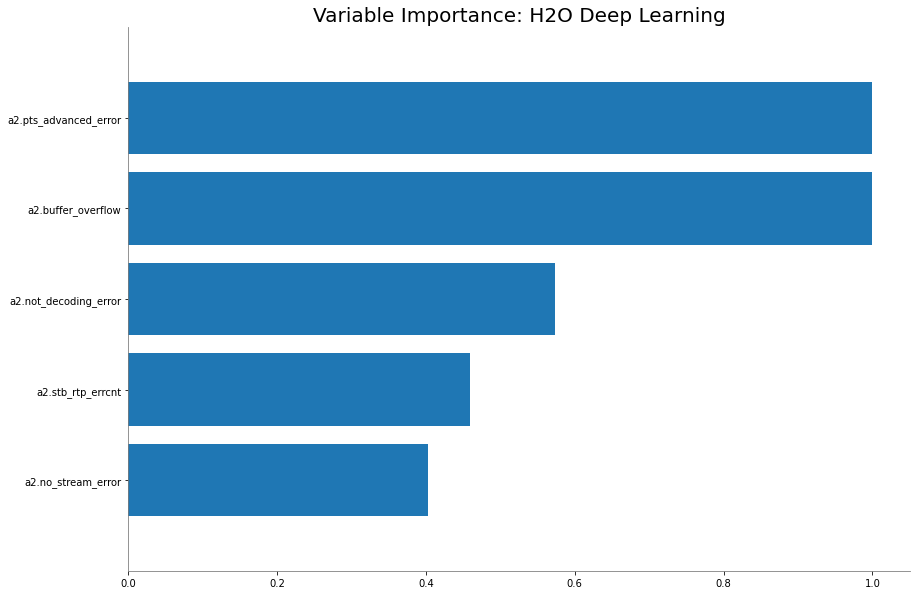

In [57]:
dl.varimp_plot()

#모델 저장

In [58]:
aml.leader.download_mojo(path = BASE_DIR)

'/content/XGBoost_2_AutoML_20200625_045026.zip'